### $\color{royalblue}{\text{ Трећа вјежба из нумеричких метода у астрономији, датум: 18.12.2025.}} $

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import  math
import random

#### $\color{magenta}{\text{Коначне разлике.}} $

In [3]:
a = np.round(np.random.random(10)*100)
print('a = ',a)

a =  [83. 75. 85. 51. 61.  8. 55. 54. 14. 13.]


Ручним методом правимо низ низова нула.

In [4]:
razlike = []
red = len(a)-1

for i in range(0, red):
    razlike.append(np.zeros(red-i))

razlike

[array([0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0.]),
 array([0.])]

Попуњавамо низове коначним разликама.

In [5]:
a1 = a    

for i in range(0, red):
    for j in range(0, red-i):
        razlike[i][j] = a1[j+1] - a1[j]
        
    a1=razlike[i]
    
razlike

[array([ -8.,  10., -34.,  10., -53.,  47.,  -1., -40.,  -1.]),
 array([ 18., -44.,  44., -63., 100., -48., -39.,  39.]),
 array([ -62.,   88., -107.,  163., -148.,    9.,   78.]),
 array([ 150., -195.,  270., -311.,  157.,   69.]),
 array([-345.,  465., -581.,  468.,  -88.]),
 array([  810., -1046.,  1049.,  -556.]),
 array([-1856.,  2095., -1605.]),
 array([ 3951., -3700.]),
 array([-7651.])]

Алтернатива је попунити низове коначним разликама преко $np.diff$.

In [6]:
a1 = a
for i in range(len(razlike)):
    razlike[i] = np.diff(a1)
    a1 = razlike[i]
    
razlike

[array([ -8.,  10., -34.,  10., -53.,  47.,  -1., -40.,  -1.]),
 array([ 18., -44.,  44., -63., 100., -48., -39.,  39.]),
 array([ -62.,   88., -107.,  163., -148.,    9.,   78.]),
 array([ 150., -195.,  270., -311.,  157.,   69.]),
 array([-345.,  465., -581.,  468.,  -88.]),
 array([  810., -1046.,  1049.,  -556.]),
 array([-1856.,  2095., -1605.]),
 array([ 3951., -3700.]),
 array([-7651.])]

Силазне разлике.

In [7]:
silazne_razlike = []
for i in range(len(razlike)):
    silazne_razlike.append(razlike[i][0])

silazne_razlike

[-8.0, 18.0, -62.0, 150.0, -345.0, 810.0, -1856.0, 3951.0, -7651.0]

Узлазне разлике.

In [8]:
uzlazne_razlike = []
for i in range(len(razlike)):
    uzlazne_razlike.append(razlike[i][-1])
    
uzlazne_razlike

[-1.0, 39.0, 78.0, 69.0, -88.0, -556.0, -1605.0, -3700.0, -7651.0]

Средишње разлике.

In [9]:
sredisnje_razlike = []

for i in range(len(razlike)):
    if np.mod(len(razlike[i]), 2)==1:
        i1 = int(len(razlike[i])/2)
        sredisnje_razlike.append(razlike[i][i1])
    else:
        i1 = int(len(razlike[i])/2 - 1)
        sredisnje_razlike.append((razlike[i][i1] + razlike[i][i1+1])/2)
        
sredisnje_razlike

[-53.0, 18.5, 163.0, -20.5, -581.0, 1.5, 2095.0, 125.5, -7651.0]

Све ове разлике ће нам требати за интерполационе полиноме, па ћемо их мало "генерализовати".

In [10]:
def silazne_razlike(y):
    red = len(y)-1 # ред интерполационог полинома - управо толико имамо и редова разлика
    razlike = []
    for i in range(0, red):
        razlike.append(np.zeros(red-i))
        
    y1 = y    
    for i in range(0, red):
        for j in range(0, red-i):
            razlike[i][j] = y1[j+1]-y1[j]
            
        y1 = razlike[i]

    silazne=[]    
    for i in range(0, red):
        silazne.append(razlike[i][0])

    return silazne

############################################################################################################
############################################################################################################

def uzlazne_razlike(y):
    
    red = len(y)-1 # red interpolacionog polinoma (toliko i redova razlika imamo)
    razlike = []
    for i in range(0, red):
        razlike.append(np.zeros(red-i))
        
    y1 = y    
    for i in range(0, red):
        for j in range(0, red-i):
            razlike[i][j] = y1[j+1]-y1[j]
            
        y1 = razlike[i]

    uzlazne=[]
  
    for i in range(0, red):
        uzlazne.append(razlike[i][len(razlike[i])-1])
        
    return  uzlazne

############################################################################################################
############################################################################################################

def sredisnje_razlike(y):

    red = len(y)-1 
    razlike = []
    for i in range(0, red):
        razlike.append(np.zeros(red-i))
        
    y1 = y    
    for i in range(0, red):
        for j in range(0, red-i):
            razlike[i][j] = y1[j+1]-y1[j]
            
        y1 = razlike[i]

    sredisnje=[]
    
    for i in range(0,red):
        
        if red % 2 == 0: 
            if i % 2 !=0:
                sredisnje.append(razlike[i][int(np.ceil((len(razlike[i]))/2.)) - 1])
            else:
                sredisnje.append(np.mean([razlike[i][int(len(razlike[i])/2) - 1], 
                                          razlike[i][int(len(razlike[i])/2)]]))
                
        else:
            if i % 2 !=0:
                sredisnje.append(np.mean([razlike[i][int(int(len(razlike[i])/2)) - 1], 
                                          razlike[i][int(int(len(razlike[i])/2))]]))
            else:
                sredisnje.append(razlike[i][int(np.ceil((len(razlike[i]))/2.)) - 1])       

    return sredisnje


---

Припрема за $\color{magenta}{\text{интерполацију}} $ - радићемо са подацима о хелиоцентричном растојању Сатурна.

In [11]:
t, x, y, z = np.loadtxt('Saturn.dat', skiprows=2, delimiter=',', unpack=True)
print(len(t), len(x), len(y), len(z))

t = t[0::10]
x = x[0::10]
y = y[0::10]
z = z[0::10]

r = np.sqrt(x**2+y**2+z**2)
print(len(t))

537 537 537 537
54



#### $\color{magenta}{\text{Њутнов полином прве врсте}} $ (са силазним разликама) за интерполацију на почетку таблице. 

$$
P(x)=y_0+ \frac{t}{1!} \Delta y_0 + \frac{t(t-1)}{2!}\Delta^2 y_0 + ... + \frac{t(t-1) ... (t-n+1)}{n!} \Delta^n y_0,
$$

$$
t=\frac{x-x_0}{h},\,\text{h - еквидистантни корак}.
$$ 


In [12]:
def njutn_1(x,y,x0):
    
#==============================================================================
#     интерполација Њутновим полиномом прве врсте
#==============================================================================
#     x, y - чворови интерполације
#     x0 - аргументи за које се врши интерполација
#==============================================================================

    silazne = silazne_razlike(y)
    h = x[1]-x[0] 
    P = y[0]
    cinilac = 1
    for i in range(0, len(y)-1):
        cinilac = cinilac*(x0-x[i])
        P = P+silazne[i]/math.factorial(i+1)*cinilac/h**(i+1)
        
    return P

Тражено растојање је:  9.411


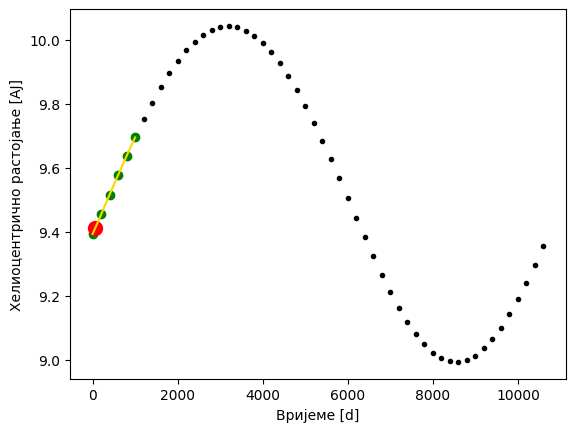

In [13]:
t0 = 59

red = 5
indeks = np.argwhere(t<t0).flatten()[-1]

r0 =  njutn_1(t[indeks:indeks+red+1], r[indeks:indeks+red+1], t0)

print('Тражено растојање је: ', np.round(r0, 3))
xx = np.linspace(t[indeks], t[indeks+red], 100)
yy = njutn_1(t[indeks:indeks+red+1], r[indeks:indeks+red+1], xx)

plt.plot(t, r, '.', color='black')
plt.plot(t[indeks:indeks+red+1], r[indeks:indeks+red+1], 'o', color='green')
plt.plot(t0, r0, 'o', color='red', markersize=10)
plt.plot(xx, yy, color='gold')
plt.xlabel('Вријеме [d]')
plt.ylabel('Хелиоцентрично растојање [AJ]')
plt.show()

#### $\color{magenta}{\text{Њутнов полином друге врсте}} $ (са узлазним разликама) за интерполацију на крају таблице. 

$$
P(x)=y_n+ \frac{t}{1!} \Delta y_{n-1} + \frac{t(t+1)}{2!}\Delta^2 y_{n-2} + ... + \frac{t(t+1) ... (t+n-1)}{n!} \Delta^n y_0,
$$
    
$$
t=\frac{x-x_n}{h}, \,\text{h - еквидистантни корак}.
$$

In [14]:
def njutn_2(x,y,x0):
    
#==============================================================================
#     интерполација Њутновим полиномом друге врсте
#==============================================================================
#     x, y - чворови интерполације
#==============================================================================

    uzlazne = uzlazne_razlike(y)
    h = x[1]-x[0] 
    P = y[-1]
    cinilac = 1
    for i in range(0, len(y)-1):
        cinilac = cinilac*(x0-x[-1-i])
        P = P+uzlazne[i]/math.factorial(i+1)*cinilac/h**(i+1)
        
    return P

Тражено растојање је:  9.189


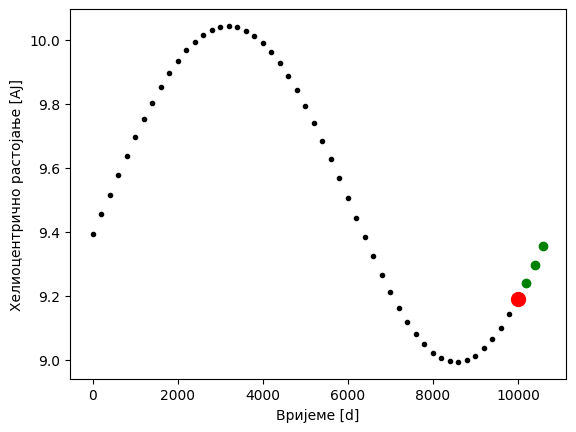

In [15]:
t0 = 10000

red = 5
indeks=np.argwhere(t>t0).flatten()[0]

r0 = njutn_2(t[indeks-red:indeks+1], r[indeks-red:indeks+1], t0)
print('Тражено растојање је: ', np.round(r0, 3))

xx = np.linspace(t[indeks-red:indeks+1], t[indeks-red:indeks+1], 100)
yy = njutn_2(t[indeks-red:indeks+1], r[indeks-red:indeks+1], xx)

plt.plot(t, r, '.', color='black')
plt.plot(t[indeks:indeks+red+1], r[indeks:indeks+red+1], 'o', color='green')
plt.plot(t0, r0, 'o', color='red', markersize=10)
plt.plot(xx, yy, color='gold')
plt.xlabel('Вријеме [d]')
plt.ylabel('Хелиоцентрично растојање [AJ]')
plt.show()

#### $\color{magenta}{\text{Лагранжов полином}} $ (за нееквидистантне аргументе).

In [16]:
def lagranz(x, y, x0):
    
#==============================================================================
#     интерполација Лагранжовим полиномом
#==============================================================================
#     x, y - чворови интерполације (np.array)
#     x0 - аргументи за које се врши интерполација (у облику низа)
#==============================================================================

    P = []
    
    for k in range(0, len(x0)):
        xi = x0[k]
        PP = 0
        for i in range(0, len(x)):
            z = np.delete(x, i)
            imenilac = xi-z
            delilac = x[i]-z

            I = 1
            D = 1
            
            for j in range(0, len(imenilac)):
                I = I*imenilac[j]
                D = D*delilac[j]
                
            
            PP = PP+I/D*y[i]
            
        P.append(PP)
        
    return P

Тражено растојање је:  [9.131]


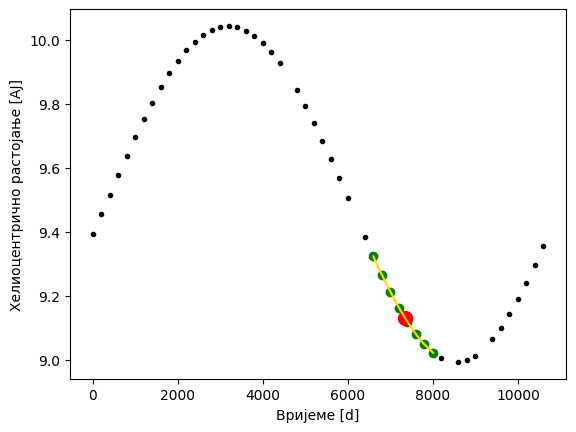

In [17]:
izbor_cvorova = random.sample(range(len(t)), 50) # бирамо насумичних 50 чворова
izbor_cvorova.sort()
t = t[izbor_cvorova]
x = x[izbor_cvorova]
y = y[izbor_cvorova]
z = z[izbor_cvorova]

r = np.sqrt(x**2+y**2+z**2)

t0 = 7342
red = 7
indeks = (np.argwhere(t<t0)).flatten()[-1]

q = (t0-t[indeks])/(t[indeks+1]-t[indeks])

if np.mod(red,2)==1: # паран број чворова
    i1 = indeks-int((red+1)/2)+1
    i2 = indeks+int((red+1)/2)
else:
    if q>=0.5:
        i1=indeks-int((red+1)/2)+1
        i2=indeks+int((red+1)/2)+1
    else:
        i1=indeks-int((red+1)/2)
        i2=indeks+int((red+1)/2)
        

plt.plot(t, r, '.', color='black') # сви чворови
plt.plot(t[i1:i2+1], r[i1:i2+1], 'o', color='green') # само они чворови који су коришћени за интерполацију

r0 = lagranz(t[i1:i2+1], r[i1:i2+1],[t0]) # интерполација
print('Тражено растојање је: ', np.round(r0, 3))

plt.plot(t0, r0, 'o', color='red', markersize=10)
tt = np.linspace(t[i1], t[i2], 100) # интерполација на интервалу [i1, i2]
rr0 = lagranz(t[i1:i2+1], r[i1:i2+1], tt)
plt.plot(tt, rr0, color='gold')

plt.xlabel('Вријеме [d]')
plt.ylabel('Хелиоцентрично растојање [AJ]')
plt.show()

#### $\color{magenta}{\text{Стирлингов полином}} $.

In [18]:
def stirling(x, y, x0, red):
    
#==============================================================================
#     интерполација Стирлинговим полиномом
#==============================================================================
#     x,y - чворови интерполације
#     x0 - аргументи за које се врши интерполација
#     ред интерполационог полинома
#==============================================================================
    
    if np.mod(red, 2)!=0:
        print('Стирлингов полином мора бити парног реда!')
        exit()
     
    h=x[1]-x[0] 
   
    indeks=np.argwhere(x<x0)[-1][0] 

    q = (x0-x[indeks])/h
    if q>=0.5:
        x = x[indeks-int(red/2)+1:indeks+int(red/2)+2]
        y = y[indeks-int(red/2)+1:indeks+int(red/2)+2]
    else:
        x = x[indeks-int(red/2):indeks+int(red/2)+1]
        y = y[indeks-int(red/2):indeks+int(red/2)+1]
    
    sredisnje = sredisnje_razlike(y)

    P = y[int(np.floor(len(x)/2))] 
    q = (x0-x[int(np.floor(len(x)/2))])/h
    q_parno = 1
        
    for i in range(1, int((len(x)+1)/2)):
        q_parno = q_parno*(q**2-(i-1)**2)
            
        if i==1:
            q_neparno = q
        else:
            q_neparno = q_neparno*(q**2-(i-1)**2)
                      
        P = P+q_neparno/math.factorial(2*i-1)*sredisnje[2*i-2]
        P = P+q_parno/math.factorial(2*i)*sredisnje[2*i-1]
            
    return P, x, y

Тражено растојање је:  10.032


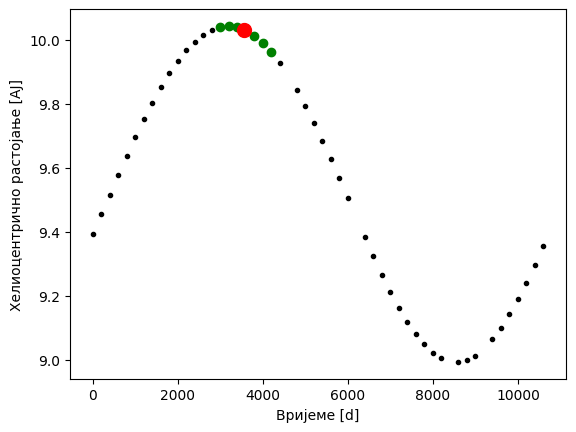

In [19]:
t0 = 3550.543
r0, x0, y0 = stirling(t, r, t0, red=6)
print('Тражено растојање је: ', np.round(r0, 3))

plt.plot(t, r, '.', color='black') # сви чворови
plt.plot(x0,y0,'o', color='green') # само они чворови који су коришћени за интерполацију
plt.plot(t0, r0, 'o', color='red', markersize=10)
plt.xlabel('Вријеме [d]')
plt.ylabel('Хелиоцентрично растојање [AJ]')
plt.show()

#### $\color{magenta}{\text{Беселов полином}} $.

In [20]:
def besel(x, y, x0, red):
    
#==============================================================================
#     интерполација Беселовим полиномом
#==============================================================================
#     x,y - чворови интерполације
#     x0 - аргументи за које се врши интерполација
#     ред интерполационог полинома
#==============================================================================

    if np.mod(red,2)==0:
        print('Беселов полином мора бити непарног реда!')
        exit()
        
    h = x[1]-x[0] 
    indeks = np.argwhere(x<x0)[-1][0] 

    x = x[indeks-int(red/2):indeks+int(red/2)+2]
    y = y[indeks-int(red/2):indeks+int(red/2)+2]

    sredisnje = sredisnje_razlike(y)

    P = 0
    sredisnje = [(y[int(len(y)/2)-1]+y[int(len(y)/2)])/2.]+sredisnje
    q = (x0-x[int(len(x)/2)-1])/h
    qq = 1
    
   
    for i in range (0, int(len(x)/2)):

        if i==0: 
            q_parno = 1
            q_neparno = q-0.5
        elif i==1:
            q_parno = q*(q-1)
            q_neparno = q*(q-1)*(q-0.5)
        else:   
            qq = qq*(q**2-(i-1)**2)
            q_parno = q*(q-i)*qq
            q_neparno = q*(q-i)*(q-0.5)*qq
            
        P = P+q_parno/math.factorial(2*i)*sredisnje[2*i]
        P = P+q_neparno/math.factorial(2*i+1)*sredisnje[2*i+1]

    return P, x, y

Тражено растојање је:  9.731


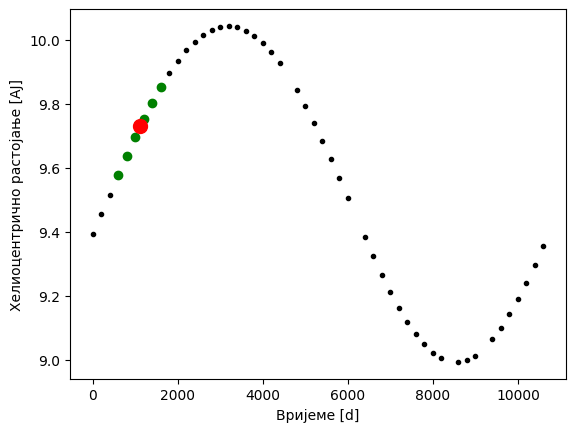

In [ ]:
t0 = 1126.543
r0, x0, y0 = besel(t, r, t0, red=5)
print('Тражено растојање је: ', np.round(r0, 3))

plt.plot(t, r, '.', color='black') # сви чворови
plt.plot(x0,y0,'o', color='green') # само они чворови који су коришћени за интерполацију
plt.plot(t0, r0, 'o', color='red', markersize=10)
plt.xlabel('Вријеме [d]')
plt.ylabel('Хелиоцентрично растојање [AJ]')
plt.show()

### $\color{green}{\text{ЗАДАЦИ:}} $

<hr style="border: none; height: 2px; background-color: green; opacity: 0.5;" />

Дата је мрежа надморских висина на површини Марса. Кораци између тачака по латитуди и лонгитуди су униформни, па је мрежа равномјерно

распоређена. Одредити надморску висину за произвољну лонгитуду на Марсу користећи произвољни интерполациони полином. 

<hr style="border: none; height: 2px; background-color: green; opacity: 0.5;" />